In [1]:
#!pip install torch

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import gradio as gr
import matplotlib.pyplot as plt
import riskfolio as rp
import plotly.express as px




In [3]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating  Daily returns
Y = data[assets].pct_change().dropna()

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.


port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
#rm = 'MV' # Risk measure used, this time will be variance
rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

[*********************100%***********************]  25 of 25 completed


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.9781%,10.6247%,0.0000%,0.0000%,9.3794%,0.0000%,0.9021%,0.0000%,0.0000%,...,10.4330%,0.0000%,0.0000%,0.0000%,0.0000%,9.2559%,0.0000%,0.0000%,2.6325%,0.0000%


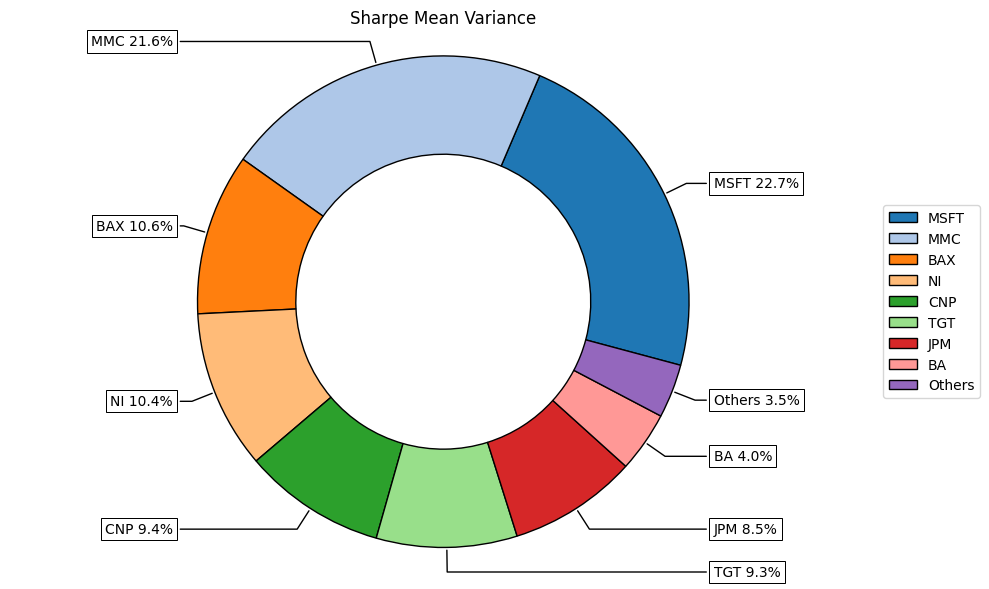

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [5]:

#print(w)
weights = w.reset_index()



# Use `hole` to create a donut-like pie chart
fig = px.pie(weights, values='weights', names='index', hole =0.5 , title='Population of European continent')
fig.show()
#fig = go.Figure(data=[go.Pie(values=w, hole=.3)])
#fig.show()

In [6]:
# API
def plot_portfolio(alpha):
    port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.


    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
    # Estimate optimal portfolio:

    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    #rm = 'MV' # Risk measure used, this time will be variance
    rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'

    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    
    
    fig = plt.figure()
    rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
    
    
    return fig
   

iface = gr.Interface(
    fn=plot_portfolio, 
    layout='vertical',
    inputs=['checkbox'],
    outputs=['plot'],
    title="Sharpe Mean Variance",
    description=" ",
    article=" ",
    theme='peach'
).launch()

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


In [7]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,3.8949%,4.1705%,1.6685%,7.6048%,5.1869%,0.0000%,0.0000%,2.5927%,...,10.6521%,0.0000%,14.7779%,0.0000%,3.6874%,5.8258%,0.0000%,0.0000%,10.0044%,0.0000%
1,0.0000%,0.7152%,6.3189%,0.8080%,0.9936%,9.3781%,3.6715%,0.0000%,0.0000%,0.9188%,...,12.0429%,0.0000%,9.9490%,0.0000%,2.8686%,7.3324%,0.0000%,0.0000%,10.2883%,0.0000%
2,0.0000%,1.4184%,7.2869%,0.0000%,0.1630%,10.0178%,2.8359%,0.1212%,0.0000%,0.0000%,...,12.6973%,0.0000%,6.9749%,0.0000%,2.0671%,7.9362%,0.0000%,0.0000%,10.4312%,0.0000%
3,0.0000%,1.8934%,8.0589%,0.0000%,0.0000%,10.4666%,1.8364%,0.2349%,0.0000%,0.0000%,...,13.2485%,0.0000%,4.0301%,0.0000%,0.5748%,8.3501%,0.0000%,0.0000%,10.5723%,0.0000%
4,0.0000%,2.2960%,8.7366%,0.0000%,0.0000%,10.9082%,0.9467%,0.2308%,0.0000%,0.0000%,...,13.7457%,0.0000%,1.4482%,0.0000%,0.0000%,8.6613%,0.0000%,0.0000%,10.1905%,0.0000%


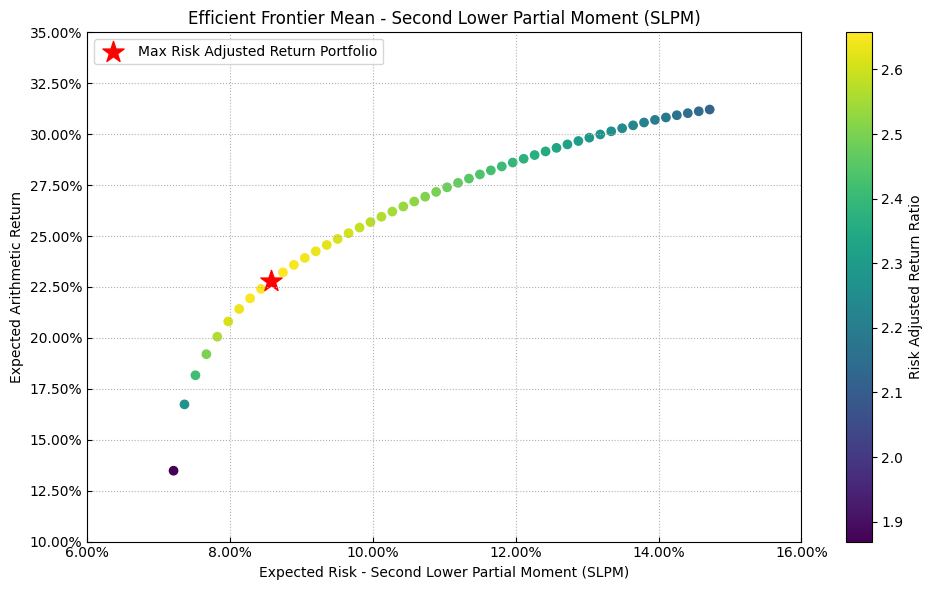

In [8]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

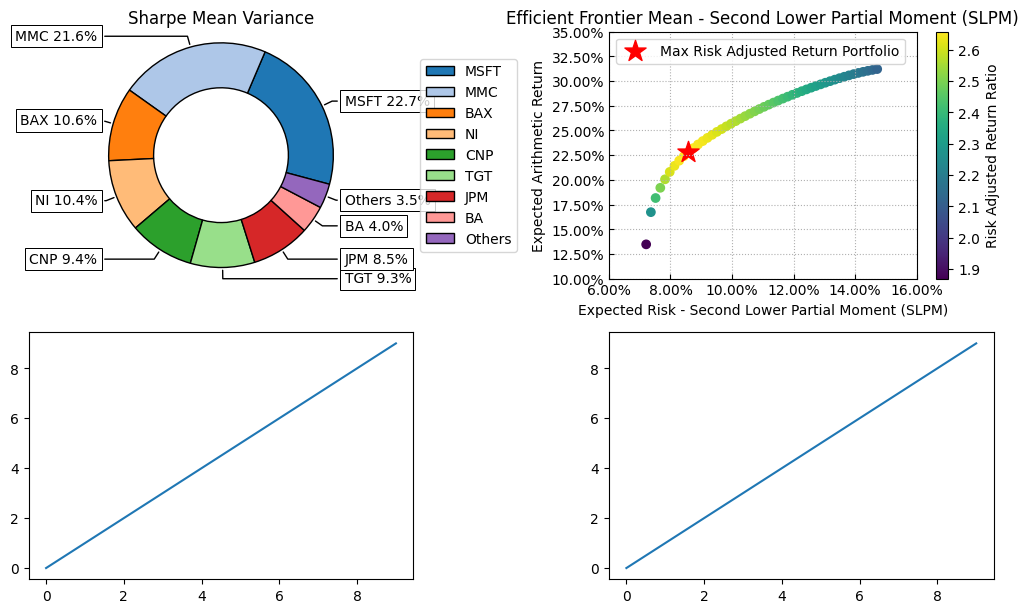

In [9]:

## ---TESTS---
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
#rm = 'MV' # Risk measure used, this time will be variance
rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'
weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    #df_pens = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets
######### -- new code --
fig = plt.figure()


plt.subplot(2, 2, 1)
rp.plot_pie(w=weights, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
# Use `hole` to create a donut-like pie chart

plt.subplot(2, 2, 2)
rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                  rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                  marker='*', s=16, c='r', height=6, width=10, ax=None)
# i made up x and y just to print something
x = range(10)
y = range(10)
plt.subplot(2, 2, 3)
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.plot(x, y)

fig.show()

In [10]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt 

def plot_portfolio(alpha):
    # Building the portfolio object
    port = rp.Portfolio(returns=Y)
    
    # Calculating optimal portfolio
    
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.
    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
    # Estimate optimal portfolio:
    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    #rm = 'MV' # Risk measure used, this time will be variance
    rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'
    weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
        #df_pens = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
    
    points = 50 # Number of points of the frontier
    frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
    label = 'Max Risk Adjusted Return Portfolio' # Title of point
    mu = port.mu # Expected returns
    cov = port.cov # Covariance matrix
    returns = port.returns # Returns of the assets
    ######### -- print   --
    fig = plt.figure()
    
    
    plt.subplot(2, 2, 1)
    rp.plot_pie(w=weights, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
    
    plt.subplot(2, 2, 2)
    rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)
    # i made up x and y just to print something
    x = range(10)
    y = range(10)
    plt.subplot(2, 2, 3)
    plt.plot(x, y)
    
    plt.subplot(2, 2, 4)
    plt.plot(x, y)
    
    return fig

iface = gr.Interface(
    fn=plot_portfolio, 
    layout='vertical',
    inputs=['checkbox'],
    outputs=['plot'],
    title="Sharpe Mean Variance",
    description=" ",
    article=" ",
    theme='peach'
).launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


In [23]:
#1986 2021
list = []
for number in range(2021-1986):
    list.append(str(number+1986))
list

['1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [27]:




def plot_portfolio(asset, start_year,end_year):
    warnings.filterwarnings("ignore")
    pd.options.display.float_format = '{:.4%}'.format
    
    # Date range
    start = '2016-01-01'
    end = '2019-12-30'

    # Tickers of assets
    assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
              'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
              'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
    assets.sort()

    # ---------- Downloading data
    data = yf.download(assets, start = start, end = end)
    data = data.loc[:,('Adj Close', slice(None))]
    data.columns = assets
    # Calculating  Daily returns
    Y = data[assets].pct_change().dropna()

    # Building the portfolio object
    port = rp.Portfolio(returns=Y)
    
    # Calculating optimal portfolio
    
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.
    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
    # Estimate optimal portfolio:
    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    #rm = 'MV' # Risk measure used, this time will be variance
    rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'
    weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
        #df_pens = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
    
    points = 50 # Number of points of the frontier
    frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
    label = 'Max Risk Adjusted Return Portfolio' # Title of point
    mu = port.mu # Expected returns
    cov = port.cov # Covariance matrix
    returns = port.returns # Returns of the assets
    ######### -- print   --
    fig = plt.figure()
    
    
    plt.subplot(2, 2, 1)
    rp.plot_pie(w=weights, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
    
    plt.subplot(2, 2, 2)
    rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)
    # i made up x and y just to print something
    x = range(10)
    y = range(10)
    plt.subplot(2, 2, 3)
    plt.plot(x, y)
    
    plt.subplot(2, 2, 4)
    plt.plot(x, y)
    
    return fig

#iface = gr.Interface(
#    fn=plot_portfolio, 
#    layout='vertical',
#    inputs=['checkbox'],
#    outputs=['plot'],
#    title="Sharpe Mean Variance",
#    description=" ",
#    article=" ",
#    theme='peach'
#).launch()

with gr.Blocks() as demo:
    gr.Markdown(
    """
    **Pypi Download Stats 📈 with Prophet Forecasting**: see live download stats for popular open-source libraries 🤗 along with a 3 month forecast using Prophet. The [ source code for this Gradio demo is here](https://huggingface.co/spaces/gradio/timeseries-forecasting-with-prophet/blob/main/app.py).
    """)
    with gr.Row():
        asset = gr.Dropdown(['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
              'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
              'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA'], label="Asset", value="MSFT")
        start = gr.Dropdown(list, label="Start_year", value="12 months")
        end = gr.Dropdown(list, label="End_year", value="12 months")


    plt = gr.Plot()

    asset.change(plot_portfolio, [asset, start,end], plt, queue=False)
    start.change(plot_portfolio, [asset, start,end], plt, queue=False) 
    end.change(plot_portfolio, [asset, start,end], plt, queue=False)    
   
    demo.load(plot_portfolio, [asset, start,end], plt, queue=False)

#demo = gr.Interface(
#    fn=plot_portfolio,
#    inputs=["text", gr.Slider(0, 100)],
#    outputs=['plot']#"text", "number", ],
#)
demo.launch()

Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f371c2b9990>, 'http://127.0.0.1:7876/', None)

[*********************100%***********************]  25 of 25 completedeted


[*******************************************************244%**********************************************************]  61 of 25 completed

Traceback (most recent call last):
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/routes.py", line 289, in run_predict
    output = await app.blocks.process_api(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/blocks.py", line 982, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/blocks.py", line 824, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_

In [11]:

def plot_portfolio(alpha):
    warnings.filterwarnings("ignore")
    pd.options.display.float_format = '{:.4%}'.format

    # Date range
    start = '2016-01-01'
    end = '2019-12-30'

    # Tickers of assets
    assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
              'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
              'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
    assets.sort()

    # ---------- Downloading data
    data = yf.download(assets, start = start, end = end)
    data = data.loc[:,('Adj Close', slice(None))]
    data.columns = assets
    # Calculating  Daily returns
    Y = data[assets].pct_change().dropna()

    # Building the portfolio object
    port = rp.Portfolio(returns=Y)
    
    # Calculating optimal portfolio
    
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.
    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
    # Estimate optimal portfolio:
    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    #rm = 'MV' # Risk measure used, this time will be variance
    rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'
    weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
        #df_pens = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
    
    points = 50 # Number of points of the frontier
    frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
    label = 'Max Risk Adjusted Return Portfolio' # Title of point
    mu = port.mu # Expected returns
    cov = port.cov # Covariance matrix
    returns = port.returns # Returns of the assets
    ######### -- print   --
    fig = plt.figure()
    
    
    plt.subplot(2, 2, 1)
    rp.plot_pie(w=weights, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
    
    plt.subplot(2, 2, 2)
    rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)
    # i made up x and y just to print something
    x = range(10)
    y = range(10)
    plt.subplot(2, 2, 3)
    plt.plot(x, y)
    
    plt.subplot(2, 2, 4)
    plt.plot(x, y)
    
    return fig

iface = gr.Interface(
    fn=plot_portfolio, 
    layout='vertical',
    inputs=['checkbox'],
    outputs=['plot'],
    title="Sharpe Mean Variance",
    description=" ",
    article=" ",
    theme='peach'
).launch()


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


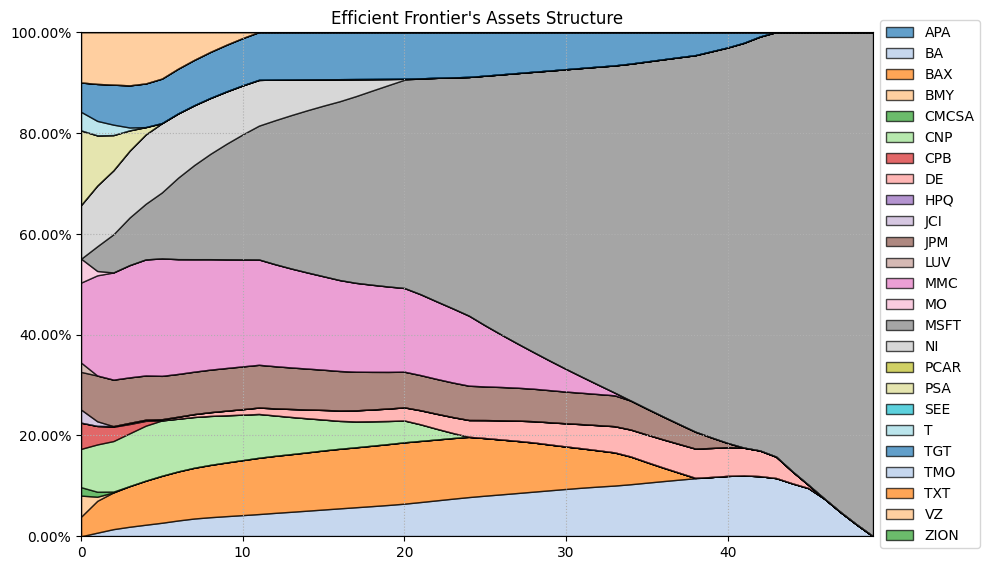

In [12]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### Historical return analysis

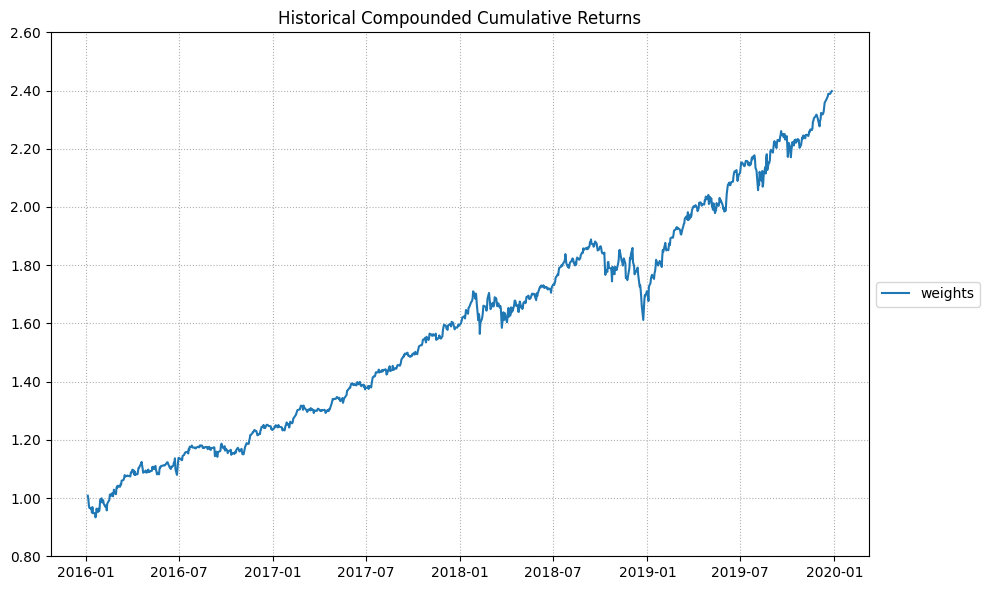

In [13]:
ws = frontier
ax = rp.plot_series(returns=Y, w=w, cmap='tab20', height=6, width=10,
                    ax=None)

### Volatility analysis

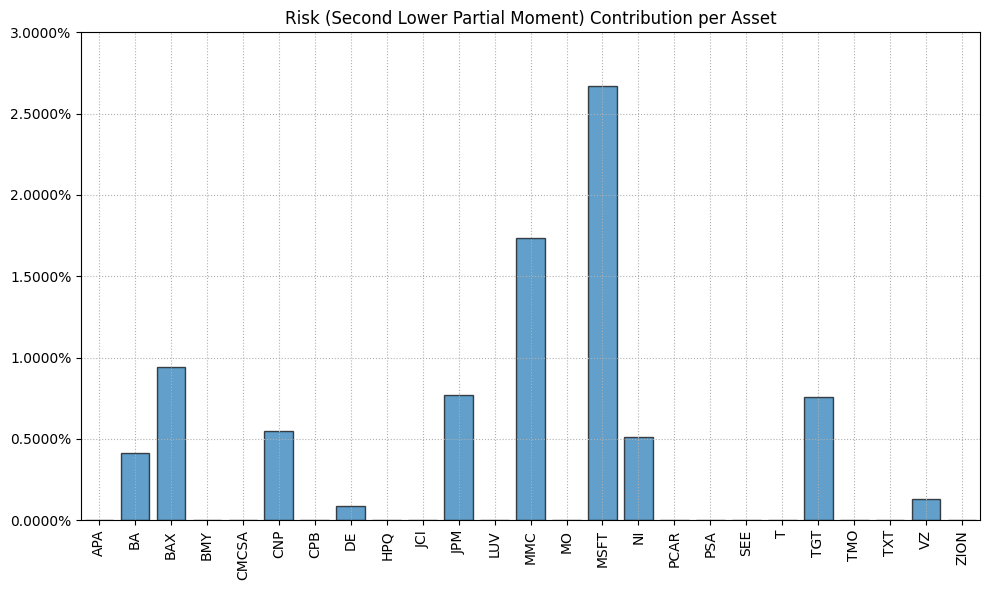

In [14]:
ax = rp.plot_risk_con(w=w, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

In [15]:
wr = pd.DataFrame()
for col, w in zip(list(Y.columns),list(w['weights'])):
    wr[col] = Y[col]*w

In [16]:
wr['Total']= wr.sum(axis=1)
Sharpe_Ratio = wr['Total'].mean()/wr['Total'].std()
Sharpe_Ratio*(252**0.5)



1.8000613575801583

Traceback (most recent call last):
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/routes.py", line 289, in run_predict
    output = await app.blocks.process_api(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/blocks.py", line 982, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/gradio/blocks.py", line 824, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/piero/Desktop/Becode/Projects/Financial_Engineering/finenv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_